In [1]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Current CUDA device:", torch.cuda.get_device_name(torch.cuda.current_device()))

PyTorch version: 2.5.0+cu124
CUDA available: True
Current CUDA device: NVIDIA GeForce RTX 4050 Laptop GPU


In [2]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")
pipe.scheduler.num_inference_steps = 50

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
prompt = "A serene landscape at sunrise, photorealistic, soft mist over a calm lake,mountains reflected in water."
guidance_scale = 8.0  

with torch.autocast("cuda"):
    generated_image = pipe(prompt, guidance_scale=guidance_scale).images[0]

generated_image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

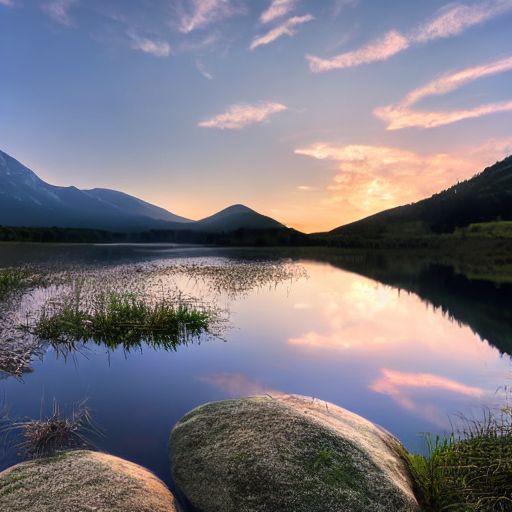

In [4]:
from PIL import Image
from IPython.display import display
display(generated_image)